In [ ]:
# !pip install scipy

In [ ]:
import numpy as np
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Домашнее задание»</b></h3>


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
# Дисперсия известна, распределение будем считать нормальным (иных указаний нет)

### Ваши код/вычисления....
beta = 0.95
sigma = np.sqrt(225) # Т.к. дана дисперсия
z = stats.norm.ppf((1 - (1-beta) / 2))
delta = 3
n = int(((sigma*z)/delta)**2)  #Запишите в эту переменную ваш высчитанный ответ!
n


96

<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
# Объем выборки меньше 30 (маленький), СКО известно, поэтому в формуле будем использовать квантиль распределеления Стьюдента:
### Ваши код/вычесления...

# Первый способ:
n = 25
x_mean = 130
sigma = 15
confidence = 0.98
h = sigma * stats.t.ppf((1 + confidence)/2, n-1)
L = int(2*h)  #Запишите в эту переменную ваш высчитанный ответ!
L


74

In [ ]:
# Второй способ:
f1, f2 = stats.t.interval(0.98, df=24, loc=130, scale=15)
L = int(f2-f1)
L

74

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
# Примем в качестве нулевой гипотезы, что различия между выборками незначительны.

# Для исходного случая (выборки по 1500 ед.):

#men  = stats.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
#women = stats.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

np.random.seed(42)

k = 0
a = 1000
for i in range(a):
    men  = stats.norm.rvs(loc=171, scale=10, size=1500)  # Выборка мужчин со средним ростом 171
    women = stats.norm.rvs(loc=170, scale=10, size=1500)  # Выборка женщин со средним ростом 170
    t, p = stats.ttest_ind(men,women)
    if p < 0.001:
        k += 1
k

276

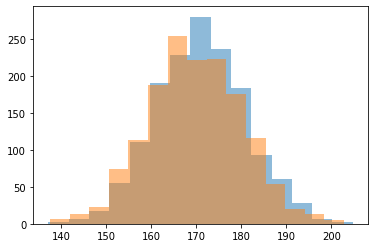

In [ ]:
plt.hist(men, alpha = 0.5, bins=15)
plt.hist(women, alpha = 0.5, bins=15);


**Примерно в 30% случаев (около 300 из 1000) нулевую гипотезу можно было бы отклонить, но посмотрим, как повлияет на результат теста изменение размера выборок:**

In [ ]:
np.random.seed(42)

k1 = 0
k2 = 0

a = 1000

# Если размеры выборок увеличить до 100000 ед., нулевую гипотезу можно будет отклонить, т.к. p-value всегда <= уровня значимости:

for i in range(a):
    men_1  = stats.norm.rvs(loc=171, scale=10, size=100000)  # Выборка мужчин со средним ростом 171
    women_1 = stats.norm.rvs(loc=170, scale=10, size=100000)  # Выборка женщин со средним ростом 170
    t, p = stats.ttest_ind(men_1,women_1)
    if p < 0.001:
        k1 += 1

# Если размеры выборок уменьшить до 100 ед., чаще всего оснований для отклонения нулевой гипотезы не будет:

for i in range(a):
    men_2  = stats.norm.rvs(loc=171, scale=10, size=100)  # Выборка мужчин со средним ростом 171
    women_2 = stats.norm.rvs(loc=170, scale=10, size=100)  # Выборка женщин со средним ростом 170
    t, p = stats.ttest_ind(men_2,women_2)
    if p < 0.001:
        k2 += 1


print(f'Для выборок в 100000 ед.: k1={k1}, для выборок в 100 ед.: k2={k2}.')

Для выборок в 100000 ед.: k1=1000, для выборок в 100 ед.: k2=6.


**Те же выводы можно проиллюстрировать: для случая с малыми выборками разброс значений значительно больше, т.е. тест получается "грубее":**

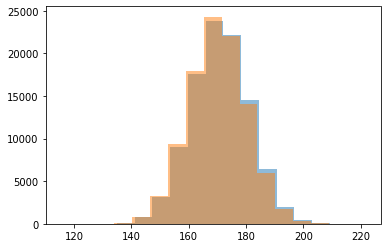

In [ ]:
plt.hist(men_1, alpha = 0.5, bins=15)
plt.hist(women_1, alpha = 0.5, bins=15);

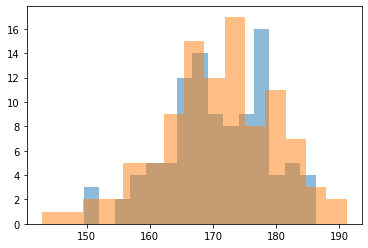

In [ ]:
plt.hist(men_2, alpha = 0.5, bins=15)
plt.hist(women_2, alpha = 0.5, bins=15);

**ВЫВОД: случай с исходными размерами выборок (по 1500 ед.) - пограничный между двумя рассмотренными выше, т.е. для однозначных выводов, что выборки схожи, недостаточно исходных данных и/или корректности в постановке вопроса.**

**Чтобы интерпретировать результаты, необходимо добавить конкретики в условия задачи (возможно, изменить уровень значимости (?)) и/или подключить экспертное мнение.**

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150
beta = 0.95
z = stats.norm.ppf((1 - (1-beta) / 2))
delta = 50
n = int(((sigma*z)/delta)**2)
print(f'Объем выборки для исследования среднего чека за кофе: {n} ед.')

Объем выборки для исследования среднего чека за кофе: 34 ед.


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
import scipy.stats as stats
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта

### Ваш код...

# Нулевая гипотеза: "волшебник" предсказывать погоду не умеет.

oddsratio, pvalue = stats.fisher_exact(observations.values) #Возможно пригодится эта функция.

print(f'Статистика: {oddsratio: .3f}, p-value: {pvalue: .3f}')
if pvalue > 0.05:
    print('Отклонять нулевую гипотезу оснований нет.')
else:
    print('Отклоняем нулевую гипотезу.')

Статистика:  0.581, p-value:  0.354
Отклонять нулевую гипотезу оснований нет.


<div class="alert alert-info">
<b>Задание № 5</b>

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

### Ваш код...
def mean_confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)
    return m-h, m, m+h


h1, m, h2 = mean_confidence_interval(data, confidence=0.90)
print(f'Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между {h1: .3f} и {h2: .3f}.')

Мы уверены на 90%, что истинное среднее значение генеральной совокупности находится в диапазоне между  6.074 и  7.183.


In [ ]:
# Проверим другим способом:
ci_lower_t, ci_upper_t = stats.t.interval(alpha=0.90, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))
ci_lower_t, ci_upper_t
# Значения совпадают.

(6.073631100387619, 7.183511753944288)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки `A` и `B` одному множеству?
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]


#Ваш код:
# Нулевая гипотеза: A и B принадлежат одному множеству. Уровень значимости примем равным 0,05.
# Примем допущение, что дисперсии выборок одинаковые, и воспользуемся t-тестом:
stat, pvalue = stats.ttest_ind(A, B)

print(f'Статистика: {stat: .7f}, p-value: {pvalue: .7f}')
if pvalue > 0.05:
    print('Отклонять нулевую гипотезу оснований нет.')
else:
    print('Отклоняем нулевую гипотезу, есть вероятность, что средние значения различаются.')

Статистика:  11.8652339, p-value:  0.0000000
Отклоняем нулевую гипотезу, есть вероятность, что средние значения различаются.


In [ ]:
# Еще раз применим t-тест, но при допущении, что дисперсии разные:
stat, pvalue = stats.ttest_ind(A, B, equal_var = False)


print(f'Статистика: {stat: .7f}, p-value: {pvalue: .7f}')
if pvalue > 0.05:
    print('Отклонять нулевую гипотезу оснований нет.')
else:
    print('Отклоняем нулевую гипотезу, есть вероятность, что средние значения различаются.')

Статистика:  11.8032537, p-value:  0.0000000
Отклоняем нулевую гипотезу, есть вероятность, что средние значения различаются.


Ttest_indResult(statistic=11.865233896372924, pvalue=4.623319592204015e-25)

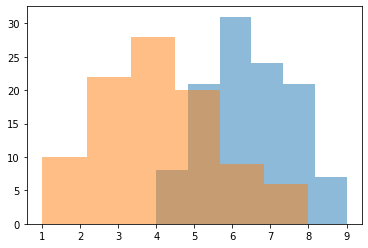

In [ ]:
# Построим гистограммы выборок A и B:
plt.hist(A, bins = 6, alpha = 0.5);
plt.hist(B, bins = 6, alpha = 0.5);
stats.ttest_ind(A,B)

**Вывод: гистограммы подтверждают выводы, сделанные на основе t-тестов: средние значения выборок различны, есть основания отклонить нулевую гипотезу.**

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы:

**Значение p-value = 0,03 означает, что вероятность отвергнуть верную нулевую гипотезу составляет 3%.
При выборе любого варианта (нормальное это распределение или нет), остаётся вероятность ошибиться, поэтому выводы следует делать исходя из конкретной задачи.**

**В приведенном примере исследуемой переменной была цена жилья. Если предположить, что проверка гипотезы требовалась, например, для нужд агентства недвижимости, то скорее всего большАя точность не требовалась бы, и в качестве доверительного интервала можно было бы выбрать стандартные 95%, тогда нулевую гипотезу можно отвергнуть.
Для извлечения большей информации, можно дополнительно использовать что-то ещё, например, квантильные диаграммы, оценить по ним асимметрию и "хвосты", подключить специалиста, учесть специфику планируемых прогнозов (например),
и уже на основе такой дополненной картины поменять первоначальные выводы или оставить.**

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы?
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

# Нулевая гипотеза: различий в эффективности препаратов нет.

stat, pvalue = stats.ttest_ind(A, B)

print(f'Статистика: {stat: .4f}, p-value: {pvalue: .4f}')
if pvalue > 0.05:
    print('p-value больше уровня значимости.')
else:
    print('p-value меньше или равно уровню значимости.')

Статистика: -1.9530, p-value:  0.0513
p-value больше уровня значимости.


**Выводы: значение p-value практически равно заданному уровню значимости (если округлить до сотых, то равно), поэтому при таких исходных данных невозможно сделать однозначных выводов. Но если строго подходить к критерию, то оснований отвергать нулевую гипотезу нет.**

- При каком минимальном p-value различия были бы уже значимы?

**Видимо, это вопрос с подвохом... Уровень значимости должен задаваться до проведеня теста, а на величину p-value может повлиять увеличение размеров выборок. Но для заданных по условию задачи объемов выборок и уровня значимости, строго говоря, результат уже значим, и мы должны оставить нулевую гипотезу.**

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284593140469285)

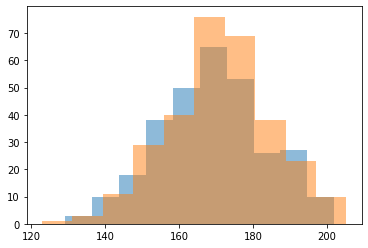

In [ ]:
# Визуализируем выборки с помощью гистограмм:
plt.hist(A, alpha = 0.5);
plt.hist(B, alpha = 0.5);
stats.ttest_ind(A,B)

**Судя по гистограммам, выборки похожи (асимметрия (смещение влево), форма распределения, средние значения, правые и левые хвосты). Можно сказать, что статистически различий в эффективности препаратов нет.**